### Mounting data and importing libraries

In [ ]:
import numpy as np ## importing libraries here
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls -al drive/MyDrive

In [ ]:
pwd

'/content'

In [ ]:
cp -rfp drive/MyDrive/baker_data.zip /content/

In [ ]:
ls -al /content

total 1216
drwxr-xr-x 1 root root    4096 Nov 16 04:37 ./
drwxr-xr-x 1 root root    4096 Nov 16 04:34 ../
-rw------- 1 root root 1221859 Feb 12  2022 baker_data.zip
drwxr-xr-x 4 root root    4096 Nov 14 14:31 .config/
drwx------ 5 root root    4096 Nov 16 04:36 drive/
drwxr-xr-x 1 root root    4096 Nov 14 14:32 sample_data/


In [ ]:
!unzip /content/baker_data.zip

Archive:  /content/baker_data.zip
   creating: Data Science Challenge/
  inflating: Data Science Challenge/Data Science Challenge Overview.pdf  
  inflating: Data Science Challenge/insurance_events - insuranc_event.csv  
  inflating: Data Science Challenge/property_insurance_test_data - property_insurance_test_data.csv  
  inflating: Data Science Challenge/property_insurance_train_data - property_insurance_train_data.csv  


In [ ]:
ls -al

total 1220
drwxr-xr-x 1 root root    4096 Nov 16 04:37  ./
drwxr-xr-x 1 root root    4096 Nov 16 04:34  ../
-rw------- 1 root root 1221859 Feb 12  2022  baker_data.zip
drwxr-xr-x 4 root root    4096 Nov 14 14:31  .config/
drwxr-xr-x 2 root root    4096 Apr 10  2020 'Data Science Challenge'/
drwx------ 5 root root    4096 Nov 16 04:36  drive/
drwxr-xr-x 1 root root    4096 Nov 14 14:32  sample_data/


In [ ]:
ls -al /content/Data\ Science\ Challenge/

total 9632
drwxr-xr-x 2 root root    4096 Apr 10  2020  ./
drwxr-xr-x 1 root root    4096 Nov 16 04:37  ../
-rw-r--r-- 1 root root   62181 Apr 10  2020 'Data Science Challenge Overview.pdf'
-rw-r--r-- 1 root root 4969418 Apr 10  2020 'insurance_events - insuranc_event.csv'
-rw-r--r-- 1 root root  940381 Apr 10  2020 'property_insurance_test_data - property_insurance_test_data.csv'
-rw-r--r-- 1 root root 3874806 Apr 10  2020 'property_insurance_train_data - property_insurance_train_data.csv'


In [ ]:
mv /content/Data\ Science\ Challenge /content/data

### Loading insurace events training data

In [ ]:
ins_events = pd.read_csv("data/insurance_events - insuranc_event.csv") # reading training data

In [ ]:
ins_events.head(2)

,property_id,record_date,event_type
0,38378,2015-08-14,claim_accepted
1,13568,2009-06-29,claim_accepted


In [ ]:
ins_events.shape

(148450, 3)

### Loading property data

In [ ]:
ins_prop_data = pd.read_csv("data/property_insurance_train_data - property_insurance_train_data.csv")

In [ ]:
ins_prop_data.head(2)

,property_id,state,zipcode,county_fips,total_bath_count,year_built,building_area_sq_ft,property_type,exterior_walls,water,sewer,heating,heating_fuel_type,fireplace,style,garage_type_parking,claims_amount
0,0,AZ,85042,4013.0,3.67,2005.0,2121.0,Single Family Residential,wood,NaN,NaN,yes,NaN,False,NaN,garage,0.0
1,1,AZ,85037,4013.0,3.00,1975.0,1783.0,Single Family Residential,wood,NaN,NaN,yes,NaN,False,NaN,NaN,0.0


### Checking shape of the data, total 40k records

In [ ]:
ins_prop_data.shape  # checking data frame shape

(40000, 17)

### Checking null values

In [ ]:
ins_prop_data.isnull().sum()

property_id                0
state                      0
zipcode                    0
county_fips               17
total_bath_count        3412
year_built              1207
building_area_sq_ft      602
property_type            602
exterior_walls         15468
water                  31332
sewer                  31772
heating                 8782
heating_fuel_type      31622
fireplace                602
style                  35488
garage_type_parking     8829
claims_amount              0
dtype: int64

In [ ]:
id_cnt = ins_prop_data['property_id'].unique()

In [ ]:
len(id_cnt)

40000

### Combining insurace events data with property data on property_id column

In [ ]:
property_data = pd.merge(ins_prop_data,ins_events,how='left',on="property_id") # merging 2 csvs here..

In [ ]:
property_data.shape

(120448, 19)

In [ ]:
id_cnt1 = property_data['property_id'].unique()

In [ ]:
len(id_cnt1)

40000

### Checking duplicate values

In [ ]:
property_data.sort_values('property_id',inplace=True)

In [ ]:
property_data.drop_duplicates("property_id",inplace = True)

In [ ]:
property_data.shape

(40000, 19)

In [ ]:
property_data.head(2)

,property_id,state,zipcode,county_fips,total_bath_count,year_built,building_area_sq_ft,property_type,exterior_walls,water,sewer,heating,heating_fuel_type,fireplace,style,garage_type_parking,claims_amount,record_date,event_type
0,0,AZ,85042,4013.0,3.67,2005.0,2121.0,Single Family Residential,wood,NaN,NaN,yes,NaN,False,NaN,garage,0.0,2007-06-06,claim_accepted
5,1,AZ,85037,4013.0,3.00,1975.0,1783.0,Single Family Residential,wood,NaN,NaN,yes,NaN,False,NaN,NaN,0.0,2005-08-10,claim_accepted


### Boxplot of 'claims_amount' feature for checking the range of values and identifying outliers

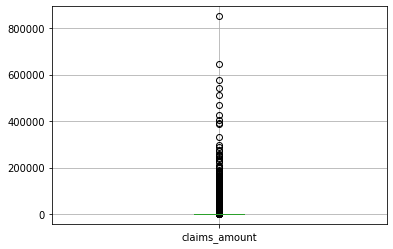

In [ ]:
boxplot = property_data.boxplot(column=['claims_amount']) # Box plot for checking the range of values and outlier

### Statistics of claims_amount value

In [ ]:
property_data['claims_amount'].describe()

count     40000.000000
mean       1110.585464
std       12576.501964
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      850977.600000
Name: claims_amount, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3353978350>]],
      dtype=object)

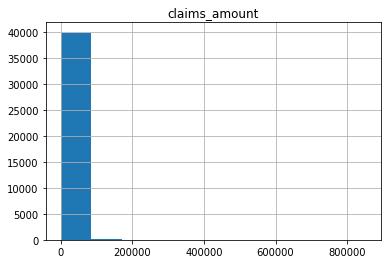

In [ ]:
property_data.hist(column = 'claims_amount')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Checking available features on combined data

In [ ]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 120447
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          40000 non-null  int64  
 1   state                40000 non-null  object 
 2   zipcode              40000 non-null  int64  
 3   county_fips          39983 non-null  float64
 4   total_bath_count     36588 non-null  float64
 5   year_built           38793 non-null  float64
 6   building_area_sq_ft  39398 non-null  float64
 7   property_type        39398 non-null  object 
 8   exterior_walls       24532 non-null  object 
 9   water                8668 non-null   object 
 10  sewer                8228 non-null   object 
 11  heating              31218 non-null  object 
 12  heating_fuel_type    8378 non-null   object 
 13  fireplace            39398 non-null  object 
 14  style                4512 non-null   object 
 15  garage_type_parking  31171 non-null

In [ ]:
property_data['claims_amount'].value_counts()

0.000000       36000
500.000000        35
25.000000          7
100.000000         7
1000.000000        6
               ...  
1285.010000        1
2103.410000        1
1819.450000        1
1082.285958        1
4493.640000        1
Name: claims_amount, Length: 3821, dtype: int64

In [ ]:
cnts = property_data['claims_amount'].value_counts()

In [ ]:
cnts.head(60)

0.0000         36000
500.0000          35
25.0000            7
100.0000           7
1000.0000          6
250.0000           6
184531.7469        5
75.0000            4
517.0000           4
300.0000           4
3185.0000          4
469.0000           3
455.0000           3
600.0000           3
253.4400           3
350.0000           3
1165.0000          3
254.0000           3
102.0000           3
330.0000           3
192.0000           3
459.0000           3
5000.0000          3
160.0000           3
150.0000           3
230.0000           2
878.1100           2
297.0000           2
380.0000           2
605.0000           2
460.0000           2
1035.0000          2
769.0000           2
2376.0000          2
1181.0000          2
20000.0000         2
691.0000           2
15000.0000         2
200.0000           2
97.0000            2
590.0000           2
1475.0000          2
16657.1300         2
298.0000           2
285.0000           2
545.0000           2
149.0000           2
5500.0000    

### Extracting subset of data frame where claim amount > 0

In [ ]:
### Extracting subset of data frame where claim amount > 0
df_claim_above_zero = property_data[property_data['claims_amount'] > 0.00 ]

In [ ]:
df_claim_above_zero['claims_amount'].describe()

count      4000.000000
mean      11105.854642
std       38353.698900
min          15.760000
25%         866.885000
50%        1886.606662
75%        4997.742500
max      850977.600000
Name: claims_amount, dtype: float64

### Here 75% value is 4997.74 , so taking claim amount above this value as high risk category.

In [ ]:
### Here 75% value is 4997.74 , so taking claim amount above this value as high risk category.

In [ ]:
property_data.isna().sum()

property_id                0
state                      0
zipcode                    0
county_fips               17
total_bath_count        3412
year_built              1207
building_area_sq_ft      602
property_type            602
exterior_walls         15468
water                  31332
sewer                  31772
heating                 8782
heating_fuel_type      31622
fireplace                602
style                  35488
garage_type_parking     8829
claims_amount              0
record_date             1476
event_type              1478
dtype: int64

### Converting claims_amount feature to categorical variable where
### values < 4997.74 labelled as 0,

### values > 4997.74 labelled as 1

In [ ]:
property_data['claims_amount'] = np.where((property_data.claims_amount < 4997.74), 0, property_data.claims_amount)

In [ ]:
property_data['claims_amount'] = np.where((property_data.claims_amount > 4997.74), 1, property_data.claims_amount)

In [ ]:
property_data['claims_amount'].unique()

array([0., 1.])

In [ ]:
property_data.isna().sum()

property_id                0
state                      0
zipcode                    0
county_fips               17
total_bath_count        3412
year_built              1207
building_area_sq_ft      602
property_type            602
exterior_walls         15468
water                  31332
sewer                  31772
heating                 8782
heating_fuel_type      31622
fireplace                602
style                  35488
garage_type_parking     8829
claims_amount              0
record_date             1476
event_type              1478
dtype: int64

### Dropping columns with almost null values

In [ ]:
## Dropping columns with almost null values

In [ ]:
property_data.drop(['water','sewer','heating_fuel_type','style'],axis=1,inplace=True)

In [ ]:
property_data.head(2)

,property_id,state,zipcode,county_fips,total_bath_count,year_built,building_area_sq_ft,property_type,exterior_walls,heating,fireplace,garage_type_parking,claims_amount,record_date,event_type
0,0,AZ,85042,4013.0,3.67,2005.0,2121.0,Single Family Residential,wood,yes,False,garage,0.0,2007-06-06,claim_accepted
5,1,AZ,85037,4013.0,3.00,1975.0,1783.0,Single Family Residential,wood,yes,False,NaN,0.0,2005-08-10,claim_accepted


### Checking unique values in each column

In [ ]:
#checking unique values in each columns
property_data['event_type'].unique()

array(['claim_accepted', 'claim_rejected', nan], dtype=object)

In [ ]:
property_data['county_fips'].unique()

array([ 4013.,    nan,  4021., 12031., 12086., 12057., 12009., 12011.,
       12015., 12019., 12095., 12105.,  6037.,  6113.,  6071., 32003.,
        6065.,  6067.,  6017.,  6061., 17031., 17089., 17043., 17111.,
       17097.,  6101.,  6115.,  6059., 12069., 12071., 12081., 12101.,
       12103., 12097., 12099., 12109., 12115., 12117., 12127., 17093.,
       17197., 53033.,  6095., 37119., 37179., 53053., 53061., 12089.,
        6013., 13057., 13227., 13063., 13089., 13067., 13097., 13247.,
       13113., 13117., 13121., 13135., 13013., 13151., 13223., 13217.,
       13297., 13139., 13015., 13077., 13095., 13051.])

In [ ]:
property_data['total_bath_count'].unique()

array([ 3.67,  3.  ,  2.33,  2.  ,  2.67,  5.33,  1.  ,  5.  ,   nan,
        3.33,  4.67,  4.  ,  6.  ,  1.5 ,  7.33,  4.33,  5.67,  6.67,
        6.33,  7.  ,  8.33,  8.  ,  8.67,  9.  ,  2.5 ,  3.5 ,  4.5 ,
        6.5 ,  5.5 , 10.  ,  8.5 , 12.  ,  7.5 ])

In [ ]:
property_data['year_built'].unique()

array([2005., 1975., 1984., 1972., 1985., 1996., 1960., 1956., 1954.,
       2001., 1970., 1957., 2004., 2006., 1976., 1991., 2000., 1997.,
       1999., 1978., 1973., 1983., 1958., 1961., 1959., 1993., 1971.,
       2003., 1979., 1969., 1998.,   nan, 1962., 1994., 1955., 1964.,
       1980., 1968., 2002., 1988., 2007., 1989., 1944., 1977., 2008.,
       1950., 1995., 1986., 1963., 1982., 1992., 1936., 1990., 1974.,
       1945., 1981., 1953., 1987., 1952., 2015., 1915., 2009., 1948.,
       1951., 2011., 1966., 1946., 1940., 1906., 1965., 1947., 1967.,
       1949., 1924., 1925., 2014., 1926., 2013., 1941., 2010., 1934.,
       1935., 1939., 1932., 1930., 1937., 1933., 1916., 1931., 2012.,
       1942., 1920., 1938., 1943., 1928., 1909., 1923., 1901., 1927.,
       1910., 1912., 1884., 1908., 1892., 1929., 1918., 1905., 1913.,
       1904., 1902., 1921., 1917., 1922., 1911., 1898., 1907., 1919.,
       1890., 1903., 1900., 1887., 1895., 1914., 1879., 1880., 1888.,
       1893., 1894.,

In [ ]:
property_data['building_area_sq_ft'].unique()

array([2121., 1783., 1592., ..., 4859., 4267., 5863.])

In [ ]:
property_data['property_type'].unique()

array(['Single Family Residential', 'Multi-Family', 'Condominium', nan,
       'Townhouse', 'Land', 'Manufactured/Mobile Home', 'Other'],
      dtype=object)

In [ ]:
property_data['exterior_walls'].unique()

array(['wood', 'stucco', 'block', 'other', nan, 'brick', 'brick_veneer',
       'adobe', 'rock_stone', 'wood_siding', 'siding_alum_vinyl',
       'composition', 'concrete_block', 'combination', 'concrete', 'tile',
       'asbestos_shingle', 'wood_shingle', 'masonry',
       'tilt_up_pre_cast_concrete', 'metal', 'shingle_not_wood', 'log'],
      dtype=object)

In [ ]:
property_data['heating'].unique()

array(['yes', nan, 'none', 'floor_wall', 'heat_pump', 'forced_air_unit',
       'central', 'solar', 'other', 'baseboard', 'electric', 'vent',
       'gravity', 'radiant', 'hot_water'], dtype=object)

In [ ]:
property_data['fireplace'].unique()

array([False, nan, True], dtype=object)

In [ ]:
property_data['garage_type_parking'].unique()

array(['garage', nan, 'carport', 'mixed', 'built_in', 'attached_garage',
       'detached_garage', 'yes', 'none', 'paved_surfaced',
       'underground_basement'], dtype=object)

In [ ]:
property_data.dropna(how='all',inplace=True) # dropping rows with all nan values.

In [ ]:
property_data.shape

(40000, 15)

In [ ]:
property_data.dropna(subset=['event_type'], how='all', inplace=True)

In [ ]:
property_data.shape

(38522, 15)

In [ ]:
## Filling NaN values with appropriate values...

In [ ]:
property_data['county_fips'] = property_data['county_fips'].fillna((property_data['county_fips'].mean()))

In [ ]:

property_data['total_bath_count'] = property_data['total_bath_count'].fillna(0)

In [ ]:

property_data['year_built'] = property_data['year_built'].fillna((property_data['year_built'].mean()))

In [ ]:

#property_data.dropna(subset=['exterior_walls'], how='all', inplace=True)
property_data['exterior_walls'] = property_data['exterior_walls'].fillna("Unknown")

In [ ]:
property_data.shape

(38522, 15)

In [ ]:
property_data['heating'] = property_data['heating'].fillna("none")

In [ ]:
property_data['garage_type_parking'] = property_data['garage_type_parking'].fillna("none")

In [ ]:
property_data.isna().sum()

property_id            0
state                  0
zipcode                0
county_fips            0
total_bath_count       0
year_built             0
building_area_sq_ft    0
property_type          0
exterior_walls         0
heating                0
fireplace              0
garage_type_parking    0
claims_amount          0
record_date            0
event_type             0
dtype: int64

In [ ]:
property_data.shape

(38522, 15)

### Checking correlation among variables

In [ ]:
property_data.corr()

,property_id,zipcode,county_fips,total_bath_count,year_built,building_area_sq_ft,claims_amount
property_id,1.000000,-0.636353,0.446347,-0.014559,0.123634,0.090924,0.011702
zipcode,-0.636353,1.000000,-0.107725,0.045855,-0.184495,-0.097232,-0.030413
county_fips,0.446347,-0.107725,1.000000,-0.040262,0.039883,0.000259,0.022569
total_bath_count,-0.014559,0.045855,-0.040262,1.000000,0.328150,0.589322,0.022842
year_built,0.123634,-0.184495,0.039883,0.328150,1.000000,0.346327,0.010205
building_area_sq_ft,0.090924,-0.097232,0.000259,0.589322,0.346327,1.000000,0.049301
claims_amount,0.011702,-0.030413,0.022569,0.022842,0.010205,0.049301,1.000000


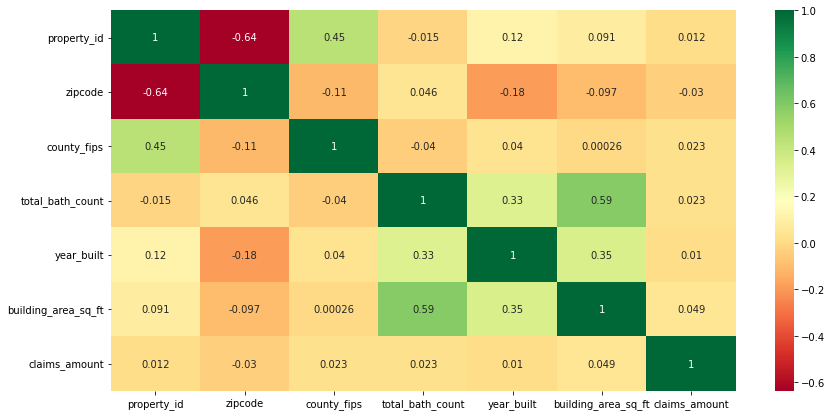

In [ ]:
corrmat = property_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,7))
g=sns.heatmap(property_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38522 entries, 0 to 120447
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          38522 non-null  int64  
 1   state                38522 non-null  object 
 2   zipcode              38522 non-null  int64  
 3   county_fips          38522 non-null  float64
 4   total_bath_count     38522 non-null  float64
 5   year_built           38522 non-null  float64
 6   building_area_sq_ft  38522 non-null  float64
 7   property_type        38522 non-null  object 
 8   exterior_walls       38522 non-null  object 
 9   heating              38522 non-null  object 
 10  fireplace            38522 non-null  object 
 11  garage_type_parking  38522 non-null  object 
 12  claims_amount        38522 non-null  float64
 13  record_date          38522 non-null  object 
 14  event_type           38522 non-null  object 
dtypes: float64(5), int64(2), object(8)


In [ ]:
property_data['claims_amount'] = property_data['claims_amount'].astype(int)

# Bivariate Plots features versus claims_amount

State Vs claims_amount Count Plot


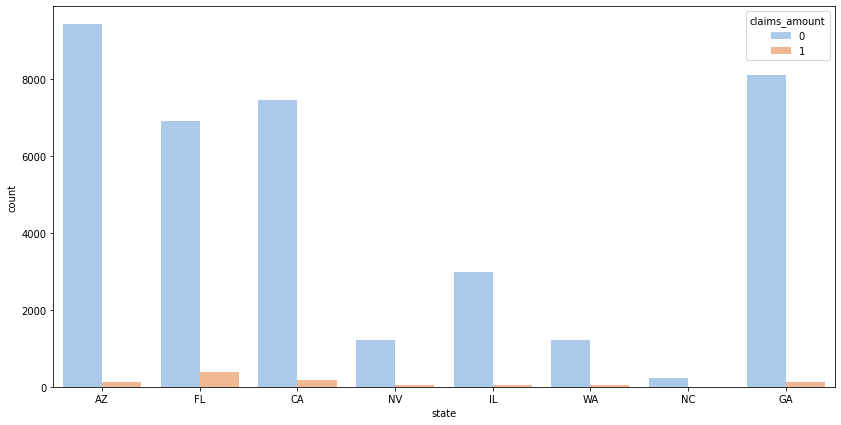

In [ ]:
%matplotlib inline
print("State Vs claims_amount Count Plot")
plt.figure(figsize=(14, 7))
sns.countplot(x="state",hue="claims_amount",palette="pastel",data=property_data)
plt.show()

property_type Vs claims_amount Count Plot


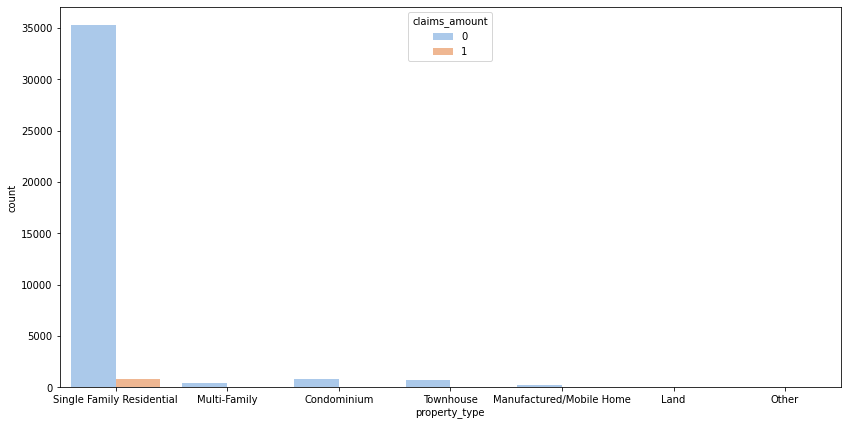

In [ ]:
%matplotlib inline
print("property_type Vs claims_amount Count Plot")
plt.figure(figsize=(14, 7))
sns.countplot(x="property_type",hue="claims_amount",palette="pastel",data=property_data)
plt.show()

exterior_walls Vs claims_amount Count Plot


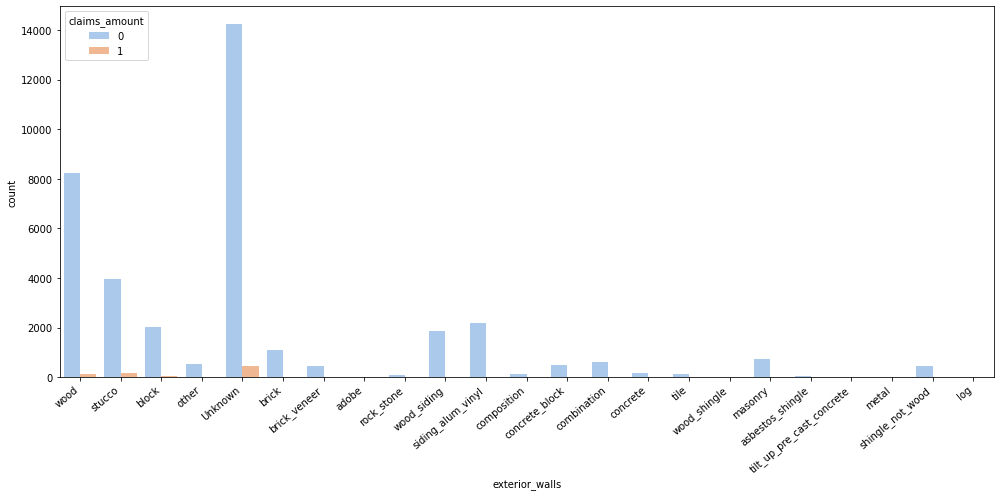

In [ ]:
#sns.lineplot(data=property_data, x="county_fips", y="claims_amount")
%matplotlib inline
print("exterior_walls Vs claims_amount Count Plot")
plt.figure(figsize=(14, 7))
ax = sns.countplot(x="exterior_walls",hue="claims_amount",palette="pastel",data=property_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

heating Vs claims_amount Count Plot


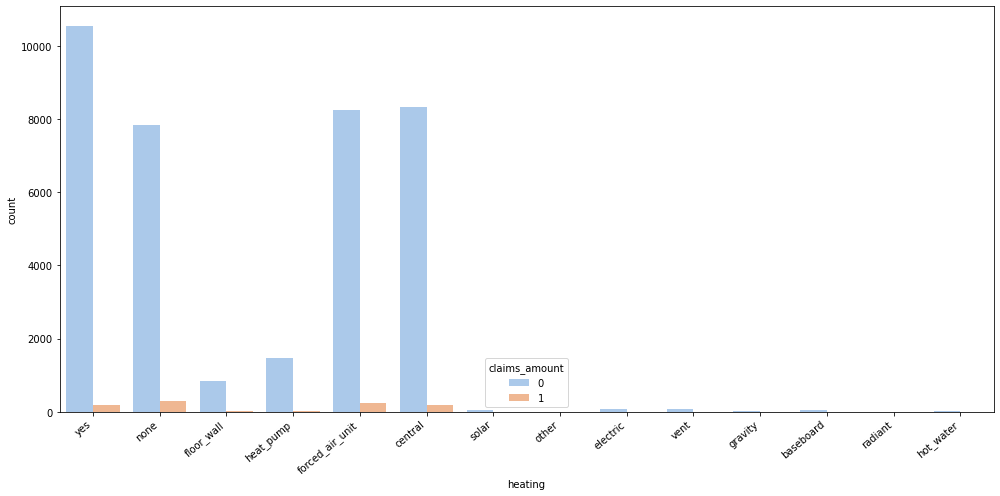

In [ ]:
%matplotlib inline
print("heating Vs claims_amount Count Plot")
plt.figure(figsize=(14, 7))
ax = sns.countplot(x="heating",hue="claims_amount",palette="pastel",data=property_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

fireplace Vs claims_amount Count Plot


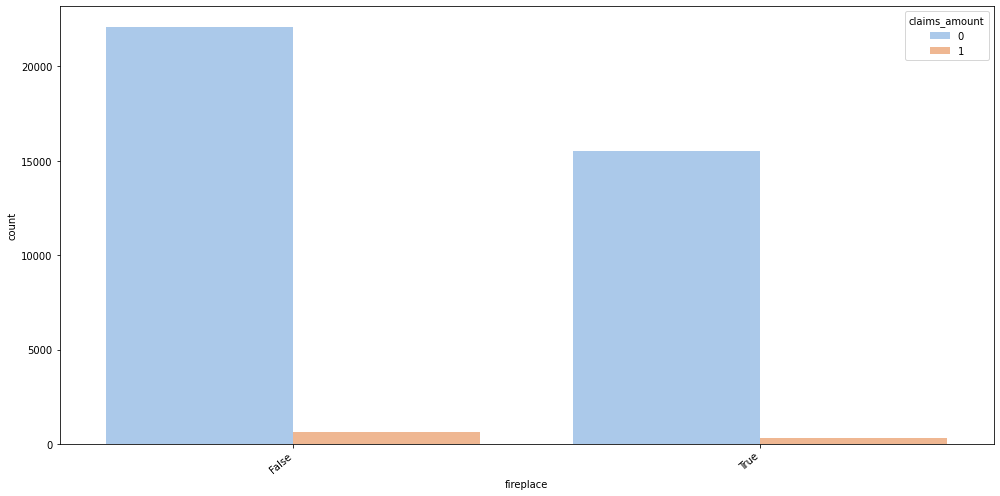

In [ ]:
%matplotlib inline
print("fireplace Vs claims_amount Count Plot")
plt.figure(figsize=(14, 7))
ax = sns.countplot(x="fireplace",hue="claims_amount",palette="pastel",data=property_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

garage_type_parking Vs claims_amount Count Plot


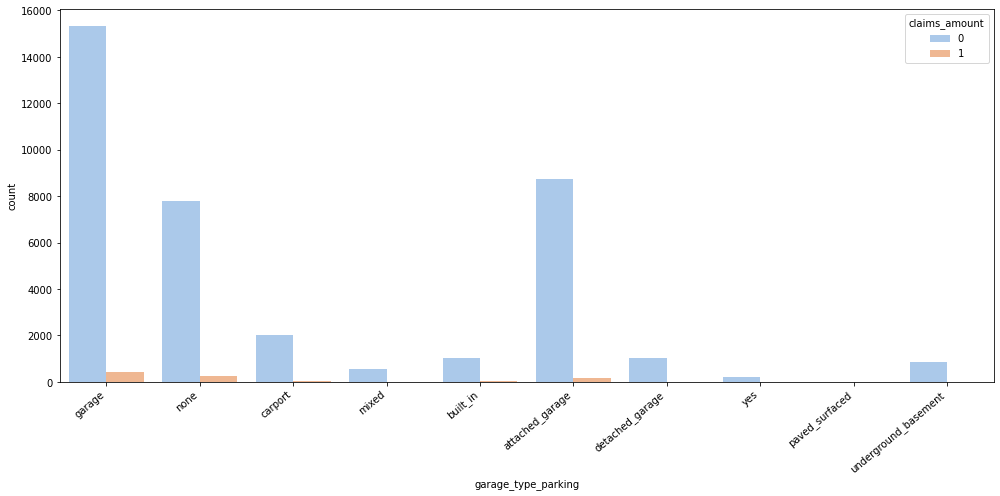

In [ ]:
%matplotlib inline
print("garage_type_parking Vs claims_amount Count Plot")
plt.figure(figsize=(14, 7))
ax = sns.countplot(x="garage_type_parking",hue="claims_amount",palette="pastel",data=property_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

event_type Vs claims_amount Count Plot


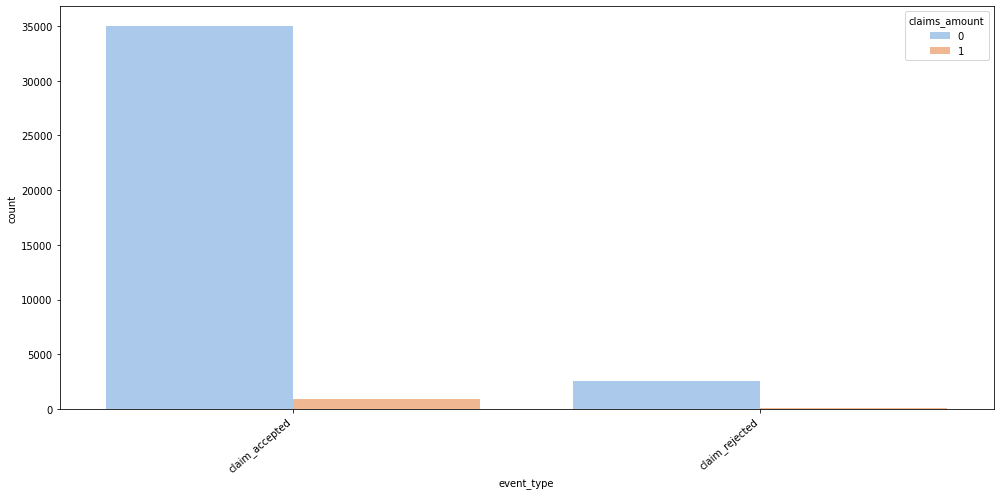

In [ ]:
%matplotlib inline
print("event_type Vs claims_amount Count Plot")
plt.figure(figsize=(14, 7))
ax = sns.countplot(x="event_type",hue="claims_amount",palette="pastel",data=property_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# Feature Engineering

In [ ]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38522 entries, 0 to 120447
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          38522 non-null  int64  
 1   state                38522 non-null  object 
 2   zipcode              38522 non-null  int64  
 3   county_fips          38522 non-null  float64
 4   total_bath_count     38522 non-null  float64
 5   year_built           38522 non-null  float64
 6   building_area_sq_ft  38522 non-null  float64
 7   property_type        38522 non-null  object 
 8   exterior_walls       38522 non-null  object 
 9   heating              38522 non-null  object 
 10  fireplace            38522 non-null  object 
 11  garage_type_parking  38522 non-null  object 
 12  claims_amount        38522 non-null  int64  
 13  record_date          38522 non-null  object 
 14  event_type           38522 non-null  object 
dtypes: float64(4), int64(3), object(8)


In [ ]:
property_data['claims_amount'].unique()

array([0, 1])

### Appling one-hot encoding for categorical values

In [ ]:
## Appling one-hot encoding for categorical values

In [ ]:
property_data = pd.concat([property_data.drop('event_type', axis=1), pd.get_dummies(property_data['event_type'],prefix='event_')], axis=1)

In [ ]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38522 entries, 0 to 120447
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_id            38522 non-null  int64  
 1   state                  38522 non-null  object 
 2   zipcode                38522 non-null  int64  
 3   county_fips            38522 non-null  float64
 4   total_bath_count       38522 non-null  float64
 5   year_built             38522 non-null  float64
 6   building_area_sq_ft    38522 non-null  float64
 7   property_type          38522 non-null  object 
 8   exterior_walls         38522 non-null  object 
 9   heating                38522 non-null  object 
 10  fireplace              38522 non-null  object 
 11  garage_type_parking    38522 non-null  object 
 12  claims_amount          38522 non-null  int64  
 13  record_date            38522 non-null  object 
 14  event__claim_accepted  38522 non-null  uint8  
 15  e

In [ ]:
property_data = pd.concat([property_data.drop('state', axis=1), pd.get_dummies(property_data['state'],prefix='state')], axis=1)

In [ ]:
property_data = pd.concat([property_data.drop('property_type', axis=1), pd.get_dummies(property_data['property_type'],prefix='propertytype')], axis=1)

In [ ]:
property_data = pd.concat([property_data.drop('exterior_walls', axis=1), pd.get_dummies(property_data['exterior_walls'],prefix='exteriorwall')], axis=1)

In [ ]:
property_data = pd.concat([property_data.drop('heating', axis=1), pd.get_dummies(property_data['heating'],prefix='heating')], axis=1)

In [ ]:
property_data = pd.concat([property_data.drop('fireplace', axis=1), pd.get_dummies(property_data['fireplace'],prefix='fireplace')], axis=1)

In [ ]:
property_data = pd.concat([property_data.drop('garage_type_parking', axis=1), pd.get_dummies(property_data['garage_type_parking'],prefix='garagetype')], axis=1)

In [ ]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38522 entries, 0 to 120447
Data columns (total 74 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   property_id                             38522 non-null  int64  
 1   zipcode                                 38522 non-null  int64  
 2   county_fips                             38522 non-null  float64
 3   total_bath_count                        38522 non-null  float64
 4   year_built                              38522 non-null  float64
 5   building_area_sq_ft                     38522 non-null  float64
 6   claims_amount                           38522 non-null  int64  
 7   record_date                             38522 non-null  object 
 8   event__claim_accepted                   38522 non-null  uint8  
 9   event__claim_rejected                   38522 non-null  uint8  
 10  state_AZ                                38522 non-null  u

# Chi2 Analysis for feature importance

In [ ]:
### Chi2 analysis for Features for their selection based on their importance.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

y = property_data.claims_amount
X = property_data.drop(['claims_amount','property_id','record_date'],axis=1)
#X = X.astype('int64')
best_features = SelectKBest(chi2, k = 20)
fit = best_features.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
feature_scores = pd.concat([dfcolumns,dfscores],axis=1)
feature_scores.columns = ['features','score']
print("Printing Top 20 Features\n",feature_scores.nlargest(20,'score'))

Printing Top 20 Features
                           features          score
0                          zipcode  432234.694783
1                      county_fips  162890.371244
4              building_area_sq_ft   32286.137927
9                         state_FL     232.399101
21          propertytype_Townhouse      77.011151
39             exteriorwall_stucco      73.646440
53                    heating_none      56.025132
7                         state_AZ      44.174886
42               exteriorwall_wood      34.433990
58                     heating_yes      31.256777
10                        state_GA      30.546032
13                        state_NV      18.889248
38  exteriorwall_siding_alum_vinyl      16.944436
67                 garagetype_none      16.107136
11                        state_IL      14.475640
22            exteriorwall_Unknown      13.107916
60                  fireplace_True      10.745146
44        exteriorwall_wood_siding       9.340549
61      garagetype_attac

### The main features are zipcode, county, building area, state, property type, exterior wall, heating type, garage type, fireplace

# Model Building Starts Here

In [ ]:
low_risk = property_data[property_data['claims_amount'] == 0 ]

In [ ]:
low_risk.shape

(37562, 74)

In [ ]:
high_risk = property_data[property_data['claims_amount'] == 1 ]

In [ ]:
high_risk.shape

(960, 74)

### Checking data is balanced or not

In [ ]:
## Since classes are not balanced , applying applying here for making the classes in balanced format.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
y = property_data.claims_amount
X = property_data.drop(['claims_amount','property_id','record_date'],axis=1)

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X, y)

### Splitting data for train and test

In [ ]:
### Splitting X and y for training...
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_smote,y_train_smote,
                        test_size=0.2, random_state=10)

### Model training with Logistic Regression

In [ ]:
### Training with Logistic Regression...
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)  # Training
y_predict = model.predict(X_test) # Test Prediction

### Evaluating logistic regression accuracy

In [ ]:
### Printing Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))
pd.crosstab(y_test, y_predict)

0.5791014975041597
              precision    recall  f1-score   support

           0       0.58      0.55      0.57      7515
           1       0.58      0.60      0.59      7510

    accuracy                           0.58     15025
   macro avg       0.58      0.58      0.58     15025
weighted avg       0.58      0.58      0.58     15025



col_0,0,1
claims_amount,,
0,4161,3354
1,2970,4540


### Model training with XGBoost

In [ ]:
### Training with XGBoost ...
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=45,learning_rate=0.25,random_state=100)
xgb_model.fit(X_train,y_train)

XGBClassifier(learning_rate=0.25, n_estimators=45, random_state=100)

### Evaluation of XGBoost accuracy

In [ ]:
### Printing Accuracy..
y_predict2 = xgb_model.predict(X_test)
print(accuracy_score(y_test, y_predict2))
print(classification_report(y_test,y_predict2))
pd.crosstab(y_test, y_predict2)

0.8743427620632279
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7515
           1       0.88      0.86      0.87      7510

    accuracy                           0.87     15025
   macro avg       0.87      0.87      0.87     15025
weighted avg       0.87      0.87      0.87     15025



col_0,0,1
claims_amount,,
0,6673,842
1,1046,6464


In [ ]:
X_train.shape

(60099, 71)

In [ ]:
X_test.head(1)

,zipcode,county_fips,total_bath_count,year_built,building_area_sq_ft,event__claim_accepted,event__claim_rejected,state_AZ,state_CA,state_FL,...,garagetype_attached_garage,garagetype_built_in,garagetype_carport,garagetype_detached_garage,garagetype_garage,garagetype_mixed,garagetype_none,garagetype_paved_surfaced,garagetype_underground_basement,garagetype_yes
68295,33027,12011.0,0.0,2000.170992,1902.387784,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X_test.to_csv("test_property.csv")

In [ ]:
X_train.columns

Index(['zipcode', 'county_fips', 'total_bath_count', 'year_built',
       'building_area_sq_ft', 'event__claim_accepted', 'event__claim_rejected',
       'state_AZ', 'state_CA', 'state_FL', 'state_GA', 'state_IL', 'state_NC',
       'state_NV', 'state_WA', 'propertytype_Condominium', 'propertytype_Land',
       'propertytype_Manufactured/Mobile Home', 'propertytype_Multi-Family',
       'propertytype_Other', 'propertytype_Single Family Residential',
       'propertytype_Townhouse', 'exteriorwall_Unknown', 'exteriorwall_adobe',
       'exteriorwall_asbestos_shingle', 'exteriorwall_block',
       'exteriorwall_brick', 'exteriorwall_brick_veneer',
       'exteriorwall_combination', 'exteriorwall_composition',
       'exteriorwall_concrete', 'exteriorwall_concrete_block',
       'exteriorwall_log', 'exteriorwall_masonry', 'exteriorwall_metal',
       'exteriorwall_other', 'exteriorwall_rock_stone',
       'exteriorwall_shingle_not_wood', 'exteriorwall_siding_alum_vinyl',
       'exteriorwa

In [ ]:
X_test.shape

(15025, 71)

In [ ]:
X_train.shape

(60099, 71)

### Model training with Random Forest

In [ ]:
### Training with Random Forest...
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(max_depth=11,n_estimators=15,max_features=71,
                                  criterion='gini',random_state=11)
RF_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, max_features=71, n_estimators=15,
                       random_state=11)

In [ ]:
importances = list(RF_model.feature_importances_)

In [ ]:
RF_model.feature_importances_

array([6.08563201e-02, 4.60922061e-02, 3.45495397e-01, 4.54549349e-02,
       5.82639066e-02, 1.13720483e-02, 1.74247036e-02, 5.96535920e-05,
       0.00000000e+00, 8.80238381e-02, 4.67576763e-05, 3.17773511e-04,
       0.00000000e+00, 4.53512060e-03, 6.42049578e-06, 7.40933552e-03,
       9.44610152e-05, 2.94218329e-03, 8.77471372e-03, 5.83980769e-04,
       3.53470642e-02, 9.91693739e-03, 3.45459582e-03, 0.00000000e+00,
       5.80917997e-05, 9.93760759e-03, 4.25151861e-03, 3.44247201e-05,
       4.63942439e-03, 5.70683833e-04, 1.09693579e-04, 2.15357872e-03,
       0.00000000e+00, 7.92210162e-04, 0.00000000e+00, 1.20132564e-02,
       0.00000000e+00, 1.67286463e-05, 1.16133878e-02, 5.98456100e-03,
       1.21310472e-03, 6.04404755e-06, 3.54350398e-02, 0.00000000e+00,
       1.73860473e-03, 0.00000000e+00, 1.14621597e-02, 0.00000000e+00,
       2.00460922e-04, 6.37739701e-03, 0.00000000e+00, 7.77429752e-04,
       0.00000000e+00, 6.26544532e-03, 3.03200305e-05, 0.00000000e+00,
      

### Random Forest model accuracy

In [ ]:
### Printing Accuracy...
y_predict3 = RF_model.predict(X_test)
print(accuracy_score(y_test, y_predict3))
print(classification_report(y_test,y_predict3))
pd.crosstab(y_test, y_predict3)

0.897171381031614
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7515
           1       0.91      0.88      0.90      7510

    accuracy                           0.90     15025
   macro avg       0.90      0.90      0.90     15025
weighted avg       0.90      0.90      0.90     15025



col_0,0,1
claims_amount,,
0,6861,654
1,891,6619


### Plotting ROC curve for Logistic Regression

threshold values [0.         0.44630739 1.        ] [0.        0.6045273 1.       ] [2 1 0]


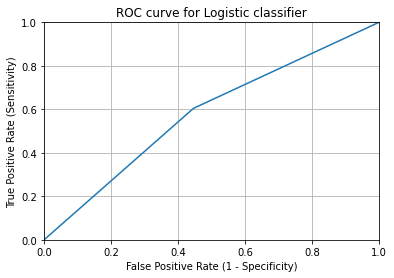

0.579109955853938


In [ ]:
from sklearn import metrics
%matplotlib inline
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
print("threshold values",fpr, tpr, thresholds)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logistic classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print(metrics.roc_auc_score(y_test,y_predict))

### Plotting ROC curve for XGBoost

threshold values [0.         0.11204258 1.        ] [0.         0.86071904 1.        ] [2 1 0]


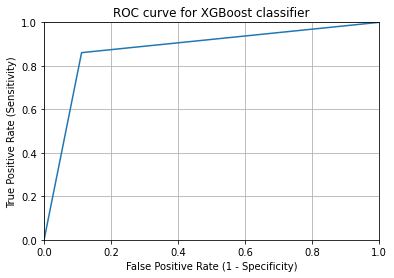

0.8743382298873181


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict2)
print("threshold values",fpr, tpr, thresholds)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for XGBoost classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print(metrics.roc_auc_score(y_test,y_predict2))

### Plotting ROC curve for Random Forest

threshold values [0.         0.08702595 1.        ] [0.         0.88135819 1.        ] [2 1 0]


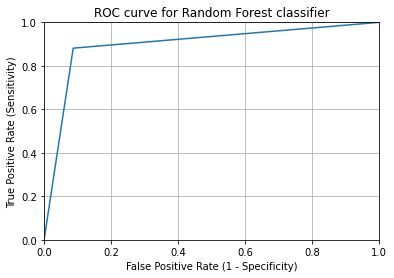

0.8971661204887162


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict3)
print("threshold values",fpr, tpr, thresholds)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Random Forest classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print(metrics.roc_auc_score(y_test,y_predict3))

# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 6)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

### Hyper Parameter Tuning Random Forest...

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
Rand_Forest = RandomForestClassifier()
RF_Tuned = RandomizedSearchCV(estimator = Rand_Forest, param_distributions = random_grid,
                              n_iter = 75, cv = 3, verbose=2, random_state=42)
RF_Tuned.fit(X_train, y_train)

### Evaluating accuracy of Random Forest tuned model...

In [ ]:
#RF_Tuned
y_predict4 = RF_Tuned.predict(X_test)
print(accuracy_score(y_test, y_predict4))
print(classification_report(y_test,y_predict4))
pd.crosstab(y_test, y_predict4)

### Plotting ROC Curve of Random Forest tuned model

In [ ]:
### Plotting ROC Curve...

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict4)
print("threshold values",fpr, tpr, thresholds)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Random Forest Tuned classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print(metrics.roc_auc_score(y_test,y_predict4))

### Hyper Parameter Tuning XGBoost...

In [ ]:
### Parameter Tuning XGBoost...

In [ ]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [25, 50, 100]}

In [ ]:
xgb = XGBClassifier()
xgb_tuned = RandomizedSearchCV(estimator=xgb,
                         param_distributions=params,
                         n_iter=25,
                         verbose=1)

In [ ]:
xgb_tuned.fit(X_train, y_train)

### Evaluating accuracy of tuned XGBoost model

In [ ]:
y_predict5 = xgb_tuned.predict(X_test)
print(accuracy_score(y_test, y_predict5))
print(classification_report(y_test,y_predict5))
pd.crosstab(y_test, y_predict5)

In [ ]:
### Plotting ROC Curve ...

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict3)
print("threshold values",fpr, tpr, thresholds)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for XGB Tuned classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print(metrics.roc_auc_score(y_test,y_predict5))

# Predicting Test Data

In [ ]:
test_csv = pd.read_csv("data/property_insurance_test_data - property_insurance_test_data.csv")

In [ ]:
test_csv.shape

In [ ]:
test_csv.info()

In [ ]:
final_data = pd.merge(test_csv,ins_events,how='left',on="property_id")

In [ ]:
final_data.sort_values('property_id',inplace=True)

In [ ]:
final_data.drop_duplicates('property_id',inplace=True)

In [ ]:
final_data.shape

In [ ]:
final_data.head(2)

In [ ]:
final_data.isna().sum()

In [ ]:
final_data.drop(['water','sewer','heating_fuel_type','style'],axis=1,inplace=True)

In [ ]:
final_data.dropna(subset=['event_type'], how='all', inplace=True)

In [ ]:
final_data.shape

In [ ]:
final_data['county_fips'] = final_data['county_fips'].fillna((final_data['county_fips'].mean()))
final_data['total_bath_count'] = final_data['total_bath_count'].fillna(0)
final_data['year_built'] = final_data['year_built'].fillna((final_data['year_built'].mean()))
final_data['exterior_walls'] = final_data['exterior_walls'].fillna("Unknown")
final_data['heating'] = final_data['heating'].fillna("none")
final_data['garage_type_parking'] = final_data['garage_type_parking'].fillna("none")

In [ ]:
final_data.isna().sum()

In [ ]:
reserve_data = final_data

In [ ]:
final_data = pd.concat([final_data.drop('event_type', axis=1), pd.get_dummies(final_data['event_type'],prefix='event_')], axis=1)
final_data = pd.concat([final_data.drop('state', axis=1), pd.get_dummies(final_data['state'],prefix='state')], axis=1)
final_data = pd.concat([final_data.drop('property_type', axis=1), pd.get_dummies(final_data['property_type'],prefix='propertytype')], axis=1)
final_data = pd.concat([final_data.drop('exterior_walls', axis=1), pd.get_dummies(final_data['exterior_walls'],prefix='exteriorwall')], axis=1)
final_data = pd.concat([final_data.drop('heating', axis=1), pd.get_dummies(final_data['heating'],prefix='heating')], axis=1)
final_data = pd.concat([final_data.drop('fireplace', axis=1), pd.get_dummies(final_data['fireplace'],prefix='fireplace')], axis=1)
final_data = pd.concat([final_data.drop('garage_type_parking', axis=1), pd.get_dummies(final_data['garage_type_parking'],prefix='garagetype')], axis=1)

In [ ]:
final_data.shape

In [ ]:
final_data.info()

In [ ]:
X_final = final_data.drop(['property_id','record_date'],axis=1)
X_final['garagetype_paved_surfaced'] = 0
X_final['heating_hot_water'] = 0
X_final['heating_radiant'] = 0
X_final['exteriorwall_adobe'] = 0
X_final['exteriorwall_tilt_up_pre_cast_concrete'] = 0

### Since Area Under ROC Curve is maximum for Random Forest Tuned classifier ,
### so selecting it for the final prediction of Test Data...

In [ ]:
y_predict_final = RF_Tuned.predict(X_final)

In [ ]:
len(y_predict_final)

In [ ]:
reserve_data['risk_of_claim'] = y_predict_final

In [ ]:
## Replacing risk_of_claim values with 1 -> "high_risk", 0 -> "low_risk".

In [ ]:
reserve_data['risk_of_claim'] = np.where((reserve_data.risk_of_claim == 0), "low_risk", reserve_data.risk_of_claim)
reserve_data['risk_of_claim'] = np.where((reserve_data.risk_of_claim == 1), "high_risk", reserve_data.risk_of_claim)

In [ ]:
reserve_data.head(2)

### importing final result to csv

In [ ]:
reserve_data.to_csv("property_insurance_test_data_predicted")

# Training with selected 20 features here...

In [ ]:
X2 = property_data.loc[:,['zipcode','county_fips','building_area_sq_ft','state_FL',
                 'propertytype_Townhouse','exteriorwall_stucco','heating_none','state_AZ',
                 'exteriorwall_wood',
                 'heating_yes','state_GA',
                 'state_NV','exteriorwall_siding_alum_vinyl',
                 'garagetype_none','state_IL',
                 'exteriorwall_Unknown','fireplace_True','exteriorwall_wood_siding',
                 'garagetype_attached_garage','propertytype_Condominium']]
y2 = property_data.claims_amount

In [ ]:
X_train_smote, y_train_smote = smote.fit_sample(X2, y2)

In [ ]:
### Splitting X and y for training...
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_smote,y_train_smote,
                        test_size=0.2, random_state=10)

In [ ]:
### Training with Logistic Regression...
model.fit(X_train, y_train)  # Training
y_predict = model.predict(X_test) # Test Prediction

In [ ]:
### Printing Accuracy
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test,y_predict))
pd.crosstab(y_test, y_predict)

In [ ]:
xgb_model = XGBClassifier(n_estimators=45,learning_rate=0.25,random_state=100)
xgb_model.fit(X_train,y_train)

In [ ]:
### Printing Accuracy..
y_predict2 = xgb_model.predict(X_test)
print(accuracy_score(y_test, y_predict2))
print(classification_report(y_test,y_predict2))
pd.crosstab(y_test, y_predict2)

In [ ]:
RF_model = RandomForestClassifier(max_depth=11,n_estimators=15,max_features=20,
                                  criterion='gini',random_state=11)
RF_model.fit(X_train,y_train)

In [ ]:
### Printing Accuracy...
y_predict3 = RF_model.predict(X_test)
print(accuracy_score(y_test, y_predict3))
print(classification_report(y_test,y_predict3))
pd.crosstab(y_test, y_predict3)

### **Serializing the Model for deployment**

In [ ]:
import pickle

In [ ]:
pickle.dump(RF_model,open("property_risk.pkl","wb"))